SIFT detect:
kp num: 123705
AKAZE detect:
kp num: 73944
SIFT time: 8.418197393417358s
AKAZE time: 2.7710843086242676s


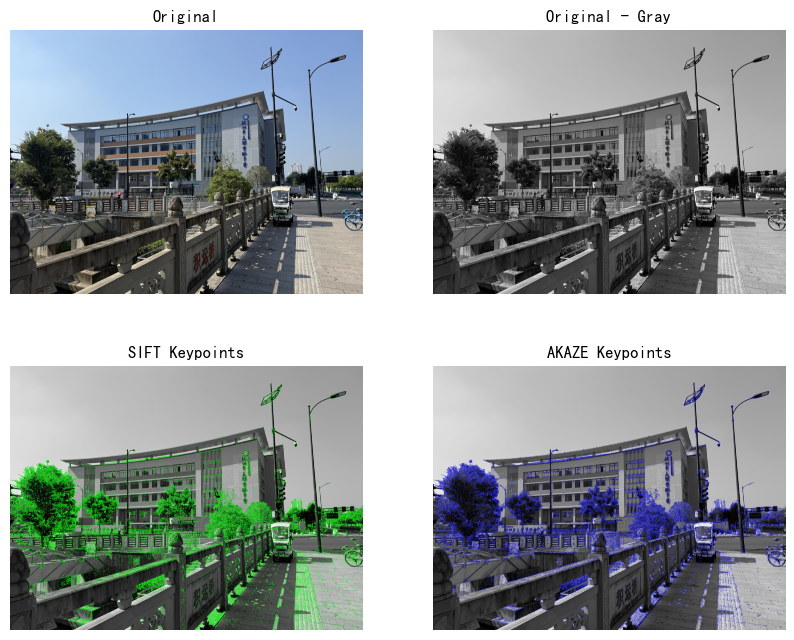

In [1]:
from matplotlib import pyplot as plt
import cv2, time
import numpy as np# noqa

# Settings
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# Handler
img: cv2.typing.MatLike = cv2.imread("IMG_5249.JPG", 0)
img_original: cv2.typing.MatLike = cv2.imread("IMG_5249.JPG")
# SIFT
img_res_sift: cv2.typing.MatLike = None# noqa
def SIFT_detect():
    global img, img_res_sift
    sift: cv2.SIFT = cv2.xfeatures2d.SIFT_create()# noqa
    kp, des = sift.detectAndCompute(img, None)
    print(f"SIFT detect:\nkp num: {len(kp)}")
    img_res_sift = cv2.drawKeypoints(img, kp, None, color=(0, 255, 0))
SIFT_START_TIME = time.time()
#for _ in np.repeat(None, 10):
SIFT_detect()
SIFT_END_TIME = time.time()
# AKAZE # noqa
img_res_akaze: cv2.typing.MatLike = None# noqa
def AKAZE_detect():
    global img, img_res_akaze# noqa
    akaze: cv2.AKAZE = cv2.AKAZE_create()# noqa
    kp, des = akaze.detectAndCompute(img, None)
    print(f"AKAZE detect:\nkp num: {len(kp)}")# noqa
    img_res_akaze = cv2.drawKeypoints(img, kp, None, color=(255, 0, 0))# noqa
AKAZE_START_TIME = time.time()# noqa
#for _ in np.repeat(None, 10):
AKAZE_detect()
AKAZE_END_TIME = time.time()# noqa

# Display Result
#plt.figure(figsize=(10, 10)) # noqa
#plt.title("Keypoints")
#plt.imshow(cv2.cvtColor(img_res_sift, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(img_res_akaze, cv2.COLOR_BGR2RGB))
#plt.show()

SIFT_TIME = SIFT_END_TIME - SIFT_START_TIME
AKAZE_TIME = AKAZE_END_TIME - AKAZE_START_TIME# noqa
print(f"SIFT time: {SIFT_TIME}s\nAKAZE time: {AKAZE_TIME}s")# noqa

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
axes[0,0].set_title("Original")

axes[0,1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0,1].set_title("Original - Gray")

axes[1,0].imshow(cv2.cvtColor(img_res_sift, cv2.COLOR_BGR2RGB))
axes[1,0].set_title("SIFT Keypoints")

axes[1,1].imshow(cv2.cvtColor(img_res_akaze, cv2.COLOR_BGR2RGB))
axes[1,1].set_title("AKAZE Keypoints")# noqa

for ay in [0,1]:
    for ax in [0,1]:
        axes[ay, ax].axis('off')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()